In [77]:
from IPython.display import Markdown as md
from IPython.display import SVG
import sympy as sp
from sympy import symbols

"""
x = symbols("x", positive = True)
ypp = symbols("y^{\prime\prime}", negative = True)
yp = symbols("y^{\prime}", negative = True)
y = symbols("y", positive = True)
A = symbols("A", positive =True)
C= symbols("C")
l = symbols("\lambda", positive = True)
s = symbols("s", positive = True)
V = symbols("V")
r = symbols("r")
"""
x = symbols("x")

ypp = symbols("y^{\prime\prime}")
yp = symbols("y^{\prime}")
y = symbols("y")

yppr = symbols("y^{\prime\prime}_r", positive = True)
ypr = symbols("y^{\prime}_r", negative = True)
yr = symbols("y_r", positive = True)

A = symbols("A")
C= symbols("C")
l = symbols("\lambda")
s = symbols("s")
V = symbols("V")
r = symbols("r")

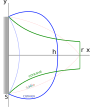

In [78]:
SVG(filename ="drawing.svg")

Minimize surface
$$
dS = \sqrt{1+y^{\prime}} dx
$$
with constant volume
$$
dV = y dx
$$
Functional to minimize
$$
F = S + \lambda V
$$

other constrains:
$$
y(0) = s
\\
y(r) \ge 0
\\
y^{\prime}(r) = 0
\\
y^{\prime\prime}(x) > 0 \text{ if } y(r)<y(0)
\\
y^{\prime\prime}(x) \le 0 \text{ otherwise}
$$

$$
F(y^{\prime}, y) = \sqrt{1+(y^{\prime})^2} + \lambda y
$$

Beltrami identity

$$
F - y^{\prime} \frac{\partial F}{\partial y^{\prime}} = C
$$

$$
\frac{{d}}{{dx}}\left(\frac{{\partial F}}{{\partial y''}}\right) = \frac{{\partial^2 F}}{{\partial y \partial y'}} - \frac{{\partial^2 F}}{{\partial y' \partial y}}
$$

In [79]:
F = sp.sqrt(1+yp**2) + l*y
second = F.diff(yp)*yp
second_term = r"y^{\prime} \frac{\partial F}{\partial y^{\prime}}"
md(f"$${second_term} = {sp.latex(second)}$$")

$$y^{\prime} \frac{\partial F}{\partial y^{\prime}} = \frac{\left(y^{\prime}\right)^{2}}{\sqrt{\left(y^{\prime}\right)^{2} + 1}}$$

In [80]:
lhs = F - second - C
display(lhs)
lhs = lhs.simplify()
eq = sp.Eq(lhs, 0)
display(eq)


-C + \lambda*y - y^{\prime}**2/sqrt(y^{\prime}**2 + 1) + sqrt(y^{\prime}**2 + 1)

Eq(-C + \lambda*y + 1/sqrt(y^{\prime}**2 + 1), 0)

In [81]:
print("let x = r")
eq_r = eq.subs(y, yr).subs(yp, ypr)
display(eq_r)
eq_r = eq_r.subs(ypr, 0)
C_ = sp.solve(eq_r, C)[0]
display(sp.Eq(C, C_))
eq2 = sp.Eq(lhs.subs(C,C_), 0)
display(eq2)

let x = r


Eq(-C + \lambda*y_r + 1/sqrt(y^{\prime}_r**2 + 1), 0)

Eq(C, \lambda*y_r + 1)

Eq(\lambda*y - \lambda*y_r - 1 + 1/sqrt(y^{\prime}**2 + 1), 0)

In [82]:
#lhs_diff = eq2.args[0].diff(y)*yp + eq2.args[0].diff(yp)*ypp
#display(sp.Eq(lhs_diff, 0))
#lhs_diff = (lhs_diff/yp).simplify()
#display(sp.Eq(lhs_diff, 0))
#print("let x = 0")
#eq3 = sp.Eq(lhs_diff.subs(yp, 0).subs(ypp, yppr), 0)
#display(eq3)
#l_ = sp.solve(eq3, l)[0]
#display(sp.Eq(l, l_))

In [83]:
lhs_ = lhs.subs(C, C_)#.subs(l, l_)
display(sp.Eq(lhs_, 0))

Eq(\lambda*y - \lambda*y_r - 1 + 1/sqrt(y^{\prime}**2 + 1), 0)

In [84]:
yp_roots = sp.solve(lhs_, yp)
display(*[sp.Eq(yp, yp_root) for yp_root in yp_roots])

Eq(y^{\prime}, -sqrt(-1 + (\lambda*y - \lambda*y_r - 1)**(-2)))

Eq(y^{\prime}, sqrt(-1 + (\lambda*y - \lambda*y_r - 1)**(-2)))

In [85]:
dx, dy = symbols("dx dy")
pm = symbols("\pm1")
yp_ = yp_roots[1].simplify()*pm
lhs = sp.solve((yp_ - yp).subs(yp, dy/dx), dx)[0]
sp.Eq(lhs, dx)

Eq(dy/(\pm1*sqrt(-1 + (\lambda*y - \lambda*y_r - 1)**(-2))), dx)

In [86]:

u = 1 - (l*(y-yr)-1)**2
print("substitute")
display(sp.Eq(symbols("u"), u))

du = u.diff(y)
eq=sp.Eq(symbols("du"), du*dy)
display(eq)
dy_ = sp.solve(eq, dy)[0]
display(sp.Eq(symbols("dy"), dy_))

substitute


Eq(u, 1 - (\lambda*(y - y_r) - 1)**2)

Eq(du, -2*\lambda*dy*(\lambda*(y - y_r) - 1))

Eq(dy, du/(2*\lambda*(-\lambda*y + \lambda*y_r + 1)))

In [87]:
u_ = symbols("u")
rhs = x-A
integrand = pm*1/(2*l*sp.sqrt(u_))
print("integrand:")
display(integrand)
print("after integration")
lhs = sp.integrate(integrand, u_)
eq = sp.Eq(lhs, rhs)
display(eq)
print("finally, after substitution")
eq = eq.subs(u_, u)
display(eq)

integrand:


\pm1/(2*\lambda*sqrt(u))

after integration


Eq(\pm1*sqrt(u)/\lambda, -A + x)

finally, after substitution


Eq(\pm1*sqrt(1 - (\lambda*(y - y_r) - 1)**2)/\lambda, -A + x)

In [88]:
eq2 = sp.Eq(eq.args[0]**2, eq.args[1]**2).subs(pm, 1)
display(eq2)
print("let x = r")
eqA = eq2.subs(x, r).subs(y, yr).simplify()
display(eqA)
A_ = sp.solve(eqA , A)[0]
display(sp.Eq(A, A_))
eq2 = eq2.subs(A, A_)
display(eq2)
print("let x = 0")
eq0 = eq2.subs(x, 0).subs(y, s)
display(eq0)

Eq((1 - (\lambda*(y - y_r) - 1)**2)/\lambda**2, (-A + x)**2)

let x = r


Eq((A - r)**2, 0)

Eq(A, r)

Eq((1 - (\lambda*(y - y_r) - 1)**2)/\lambda**2, (-r + x)**2)

let x = 0


Eq((1 - (\lambda*(s - y_r) - 1)**2)/\lambda**2, r**2)

In [89]:
l_ = sp.solve(eq0, l)[0].simplify()
display(sp.Eq(l, l_))
eq2 = eq2.subs(l, l_).simplify()
eq2 = sp.Eq(eq2.args[0], eq2.args[1].factor())
display(eq2)

Eq(\lambda, 2*(s - y_r)/(r**2 + s**2 - 2*s*y_r + y_r**2))

Eq((r - x)**2, -(y - y_r)*(-r**2 - s**2 + s*y + s*y_r - y*y_r)/(s - y_r))

In [90]:
y_roots = sp.solve(eq2 , y)
display(*[sp.Eq(y, root) for root in y_roots])

Eq(y, (r**2 + s**2 - y_r**2 - sqrt((r**2 - 2*r*s + 2*r*y_r + s**2 + 2*s*x - 2*s*y_r - 2*x*y_r + y_r**2)*(r**2 + 2*r*s - 2*r*y_r + s**2 - 2*s*x - 2*s*y_r + 2*x*y_r + y_r**2)))/(2*(s - y_r)))

Eq(y, (r**2 + s**2 - y_r**2 + sqrt((r**2 - 2*r*s + 2*r*y_r + s**2 + 2*s*x - 2*s*y_r - 2*x*y_r + y_r**2)*(r**2 + 2*r*s - 2*r*y_r + s**2 - 2*s*x - 2*s*y_r + 2*x*y_r + y_r**2)))/(2*(s - y_r)))

In [91]:
y_ = y_roots[0]
display(sp.Eq(y, y_))

Eq(y, (r**2 + s**2 - y_r**2 - sqrt((r**2 - 2*r*s + 2*r*y_r + s**2 + 2*s*x - 2*s*y_r - 2*x*y_r + y_r**2)*(r**2 + 2*r*s - 2*r*y_r + s**2 - 2*s*x - 2*s*y_r + 2*x*y_r + y_r**2)))/(2*(s - y_r)))

In [97]:
y_roots[0].subs({s: 1, r:0.3, yr : 0}).subs(x, 0)

0.0900000000000000

In [17]:
import numpy as np
import functools

@functools.lru_cache()
def Y_yr(s_, r_, yr_):
    def func(x_):
        if (x_<0) or (x_>r_):
            return np.nan
        else:
            if yr_ == s_: return lambda _: s_
            return sp.N(y_.subs({s:s_, r:r_, yr: yr, x: x_}))
    return func

def S_yr(s_, r_, yr_, scipy = True):
    if yr_==s: return r_
    dS = sp.sqrt(1+y_.diff(x)**2).simplify()
    dS = dS.subs({s:s_, r:r_, yr: yr_}).simplify()
    if scipy:
        from scipy.integrate import quad
        dS_func = sp.lambdify(x, dS)
        return quad(dS_func, 0, r_)[0]
    return sp.N(sp.integrate(dS, (x, 0, r_)))

def V_yr(s_, r_, yr_, scipy = True):
    if yr_ == s_: return s_*r_
    if yr_ > s_: raise ValueError("yr > s is not yet implemented")
    dV = y_.subs({s:s_, r:r_, yr: yr_})#dx
    if scipy:
        from scipy.integrate import quad
        dV_func = sp.lambdify(x, dV)
        return quad(dV_func, 0, r_)[0]
    return sp.N(sp.integrate(dV, (x, 0, r_)))



In [18]:

@functools.lru_cache()
def yr_V(s_, r_, V_):
    V_min = V_yr(s_, r_, 0)
    V_max = s_*r_
    if V_ == V_min: return V_min
    if V_ == V_max: return V_max
    if V_<V_min: return np.nan
    if V_>V_max: return np.nan

    from scipy.optimize import brentq
    def fsolve(yr_):
        return V_yr(s_, r_, yr_)-V_
    yr_min = max(2*V_/r_ - s_, 0)
    yr_max = min(V_/r_, s_)
    return brentq(fsolve, yr_min, yr_max)


@functools.lru_cache()
def Y(s_, r_, V_):
    yr_ = yr_V(s_, r_, V_)
    print(f"yr = {yr_}")
    return Y_yr(s_, r_, yr_)

@functools.lru_cache()
def S(s_, r_,  V_):
    yr_ = yr_V(s_, r_, V_)
    print(f"yr = {yr_}")
    return S_yr(s_, r_, yr_)

$$
\frac{{d}}{{dx}}\left(\frac{{\partial F}}{{\partial y''}}\right) = \frac{{\partial^2 F}}{{\partial y \partial y'}} - \frac{{\partial^2 F}}{{\partial y' \partial y}}
$$